In [742]:
# Common imports
import numpy as np
from numpy import sqrt 
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.impute import SimpleImputer
from statsmodels.multivariate.pca import PCA

In [778]:
import numpy as np 
import pandas as pd
df_general = pd.read_excel('/Users/abhisaurav/Desktop/BANKS.XLSX', sheet_name='Dataset 1 - General',header=[0, 1])
df_general.columns = ['_'.join(col).strip() for col in df_general.columns.values]
df_general = df_general.rename(columns={df_general.columns[0]: 'Firm_Name'})


In [744]:

df_underwriting = pd.read_excel('/Users/abhisaurav/Desktop/BANKS.XLSX', sheet_name='Dataset 2 - Underwriting',header=[0, 1])
df_underwriting.columns = ['_'.join(col).strip() for col in df_underwriting.columns.values]
df_underwriting = df_underwriting.rename(columns={df_underwriting.columns[0]: 'Firm_Name'})


In [745]:
df_merge = pd.merge(df_general, df_underwriting, on=df_general.columns[0], how='inner')


In [746]:
texts_contains = ['Firm_Name','NWP', 'SCR coverage ratio', 'GWP', 'assets', 'Gross claims incurred', 'Net combined ratio']
df = df_merge[df_merge.columns[df_merge.columns.str.contains('|'.join(texts_contains))]]
df

,Firm_Name,NWP (£m) _2016YE,NWP (£m) _2017YE,NWP (£m) _2018YE,NWP (£m) _2019YE,NWP (£m) _2020YE,SCR coverage ratio_2016YE,SCR coverage ratio_2017YE,SCR coverage ratio_2018YE,SCR coverage ratio_2019YE,...,Gross claims incurred (£m)_2016YE,Gross claims incurred (£m)_2017YE,Gross claims incurred (£m)_2018YE,Gross claims incurred (£m)_2019YE,Gross claims incurred (£m)_2020YE,Net combined ratio_2016YE,Net combined ratio_2017YE,Net combined ratio_2018YE,Net combined ratio_2019YE,Net combined ratio_2020YE
0,Firm 1,-17754.100486,0.000000,0.000000,0.000000,0.000000,0.162520,5.588700e+07,0.000000,0.000000,...,0.000000,0.005515,0.000000,0.000000,0.000000,0.000000,71.298841,0.000000,0.000000,0.000000
1,Firm 2,9.244369,0.098771,40.812426,35.643071,13.626145,5.648647,3.683321e+00,10.239507,5.792780,...,44.467865,29.489599,34.100482,0.000000,0.000000,1.276296,2.176071,0.687316,0.000000,0.000000
2,Firm 3,0.000000,0.806130,36.620199,86.630018,54.744180,1.135498,1.713763e+00,1.222781,1.348312,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Firm 4,19677.453353,41072.816156,20885.506445,14719.672914,49204.465136,0.679158,1.224834e+00,2.699102,2.025206,...,14.340938,71.062447,87.912471,42.280402,3.668494,0.672481,1.986952,1.841528,3.817221,-3.548731
4,Firm 5,128.812208,10.407371,79.579663,79.423623,61.727295,1.463499,4.963118e+00,3.232800,4.342353,...,48.738606,425.748869,691.379669,174.101260,5.927624,0.509871,0.087592,2.403635,1.240876,1.869668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Firm 321,0.000000,0.000000,-0.167178,-6.813367,31.258806,0.000000,2.463978e+01,2.820308,0.032026,...,4.792301,8.202431,5.780854,4.285171,2.682640,0.106628,0.302935,1.809086,0.603102,0.159544
321,Firm 322,3315.466643,4136.476625,2192.750865,2252.917257,2780.628432,2.362718,9.682089e-01,2.215886,0.290911,...,79.447005,185.748107,106.097753,107.689878,58.267861,0.713777,0.743500,2.135501,2.316140,1.003350
322,Firm 323,0.000000,0.000000,0.000000,0.000000,0.000000,2.056229,5.297021e+00,22.542680,67.276255,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
323,Firm 324,29.811172,21.003008,13.551740,6.145755,49.793157,2.304061,4.530059e-01,0.004832,0.064615,...,3.177444,9.268865,5.149223,6.864045,0.514859,1.847102,0.152000,1.191096,0.337071,1.416556


In [747]:
texts_contains = ['Firm','2020']
df_filtered_2020 = df_filtered[df_filtered.columns[df_filtered.columns.str.contains('|'.join(texts_contains))]]
df_filtered_2020['NWP/GWP'] = df_filtered_2020['NWP (£m) _2020YE'] / df_filtered_2020['GWP (£m)_2020YE']
df_filtered_2020['NWP/GWP'].fillna(0, inplace=True)
df_filtered_2020 = df_filtered_2020[(df_filtered_2020['NWP/GWP'] >= -100) & (np.isfinite(df_filtered_2020['NWP/GWP']))]

df_filtered_2020 = df_filtered_2020[(df_filtered_2020['NWP/GWP'] != 0)]
df_filtered_2020

,Firm_Name,NWP (£m) _2020YE,SCR coverage ratio_2020YE,GWP (£m)_2020YE,Total assets (£m)_2020YE,Excess of assets over liabilities (£m) [= equity]_2020YE,Gross claims incurred (£m)_2020YE,Net combined ratio_2020YE,NWP/GWP
1,Firm 2,13.626145,3.170682,16.723242,2.665741,12.456319,0.000000,0.000000,0.814803
2,Firm 3,54.744180,0.245283,38.119418,540.594671,412.466207,0.000000,0.000000,1.436123
3,Firm 4,49204.465136,1.195829,37761.883321,37423.543261,24127.839035,3.668494,-3.548731,1.303019
4,Firm 5,61.727295,1.618600,32.277535,15.049929,103.180972,5.927624,1.869668,1.912392
5,Firm 6,5969.707516,2.497964,4209.115926,107547.787494,9295.371569,268.527873,0.384564,1.418281
...,...,...,...,...,...,...,...,...,...
315,Firm 316,-0.024124,3.045896,-0.263230,1793.992384,772.623500,126.537736,1.641400,0.091647
316,Firm 317,3479.287464,1.312616,3716.102706,8554.845015,373.962481,27.476123,0.602593,0.936273
320,Firm 321,31.258806,3.353946,67.341214,8619.920610,60.013312,2.682640,0.159544,0.464185
321,Firm 322,2780.628432,2.624036,1129.664936,4568.891465,3640.241631,58.267861,1.003350,2.461463


<AxesSubplot:>

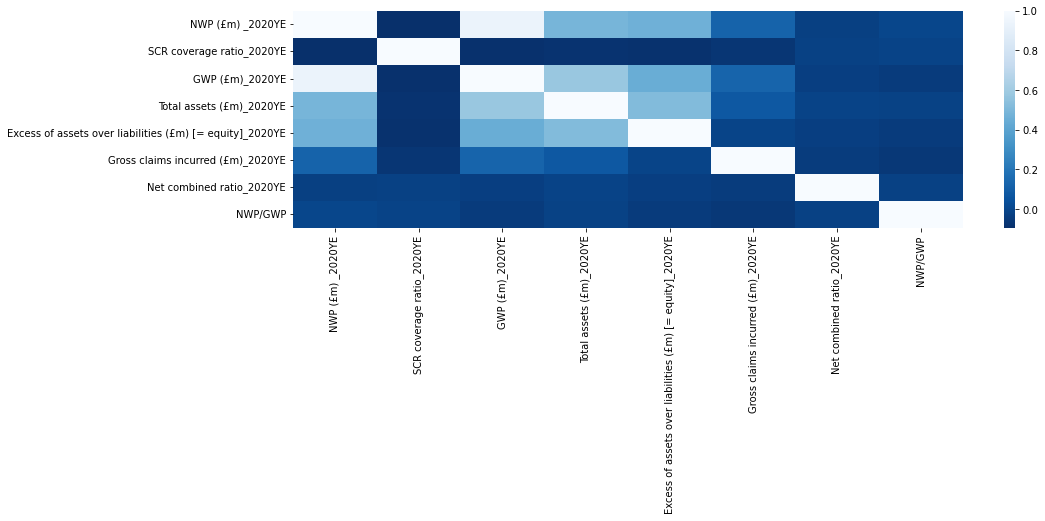

In [748]:
# Feature correlation
plt.figure(figsize=(15,4))
f_cor = df_filtered_2020.corr()
sns.heatmap(f_cor, cmap="Blues_r")

In [749]:
#checking outliers from the norms:
from scipy.stats import zscore
zscore_threshold = 2
columns_of_interest = ['Gross claims incurred (£m)_2020YE', 'Net combined ratio_2020YE','NWP/GWP']
numeric_columns = df_filtered_2020[columns_of_interest]
z_scores = numeric_columns.apply(zscore)
outliers_mask = (z_scores.abs() > zscore_threshold).any(axis=1)
outliers = df_filtered_2020[outliers_mask]
df_treated = df_filtered_2020[~outliers_mask]


In [750]:
#checking outliers from the norms:
from scipy.stats import zscore
zscore_threshold = 3
columns_of_interest = ['SCR coverage ratio_2020YE']
numeric_columns = df_treated[columns_of_interest]
z_scores = numeric_columns.apply(zscore)
outliers_mask = (z_scores.abs() > zscore_threshold).any(axis=1)
outliers = df_treated[outliers_mask]
df_treated = df_treated[~outliers_mask]
df_treated

,Firm_Name,NWP (£m) _2020YE,SCR coverage ratio_2020YE,GWP (£m)_2020YE,Total assets (£m)_2020YE,Excess of assets over liabilities (£m) [= equity]_2020YE,Gross claims incurred (£m)_2020YE,Net combined ratio_2020YE,NWP/GWP
1,Firm 2,13.626145,3.170682,16.723242,2.665741,12.456319,0.000000,0.000000,0.814803
2,Firm 3,54.744180,0.245283,38.119418,540.594671,412.466207,0.000000,0.000000,1.436123
3,Firm 4,49204.465136,1.195829,37761.883321,37423.543261,24127.839035,3.668494,-3.548731,1.303019
4,Firm 5,61.727295,1.618600,32.277535,15.049929,103.180972,5.927624,1.869668,1.912392
5,Firm 6,5969.707516,2.497964,4209.115926,107547.787494,9295.371569,268.527873,0.384564,1.418281
...,...,...,...,...,...,...,...,...,...
315,Firm 316,-0.024124,3.045896,-0.263230,1793.992384,772.623500,126.537736,1.641400,0.091647
316,Firm 317,3479.287464,1.312616,3716.102706,8554.845015,373.962481,27.476123,0.602593,0.936273
320,Firm 321,31.258806,3.353946,67.341214,8619.920610,60.013312,2.682640,0.159544,0.464185
321,Firm 322,2780.628432,2.624036,1129.664936,4568.891465,3640.241631,58.267861,1.003350,2.461463


In [751]:
# Analysing Gross Claimed Incurrred for the last 5 years
merged_df = pd.merge(df, df_treated, on='Firm_Name', how='inner')
gross_columns = [col for col in merged_df.columns if 'gross' in col.lower()]
df_gci = merged_df[['Firm_Name'] + gross_columns]
df_gci = df_gci.iloc[:, :-1]
df_gci






,Firm_Name,Gross claims incurred (£m)_2016YE,Gross claims incurred (£m)_2017YE,Gross claims incurred (£m)_2018YE,Gross claims incurred (£m)_2019YE,Gross claims incurred (£m)_2020YE_x
0,Firm 2,44.467865,29.489599,34.100482,0.000000,0.000000
1,Firm 3,0.000000,0.000000,0.000000,0.000000,0.000000
2,Firm 4,14.340938,71.062447,87.912471,42.280402,3.668494
3,Firm 5,48.738606,425.748869,691.379669,174.101260,5.927624
4,Firm 6,125.076792,457.319722,364.148755,257.332452,268.527873
...,...,...,...,...,...,...
161,Firm 316,33.539595,122.105504,119.261285,46.614391,126.537736
162,Firm 317,7.919191,67.248420,240.154675,299.167769,27.476123
163,Firm 321,4.792301,8.202431,5.780854,4.285171,2.682640
164,Firm 322,79.447005,185.748107,106.097753,107.689878,58.267861


In [752]:
#year on year analysis with 500% change threshold

threshold = 5  # 500% change threshold
df_gci['Percentage_change'] = df_gci.loc[:, 'Gross claims incurred (£m)_2016YE':'Gross claims incurred (£m)_2020YE_x'].pct_change(axis=1).abs().max(axis=1)
df_gci['Changing_business_profile'] = df_gci['Percentage_change'].apply(lambda x: 'Yes' if x > threshold else 'No')
df_gci

,Firm_Name,Gross claims incurred (£m)_2016YE,Gross claims incurred (£m)_2017YE,Gross claims incurred (£m)_2018YE,Gross claims incurred (£m)_2019YE,Gross claims incurred (£m)_2020YE_x,Percentage_change,Changing_business_profile
0,Firm 2,44.467865,29.489599,34.100482,0.000000,0.000000,1.000000,No
1,Firm 3,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,No
2,Firm 4,14.340938,71.062447,87.912471,42.280402,3.668494,3.955216,No
3,Firm 5,48.738606,425.748869,691.379669,174.101260,5.927624,7.735352,Yes
4,Firm 6,125.076792,457.319722,364.148755,257.332452,268.527873,2.656312,No
...,...,...,...,...,...,...,...,...
161,Firm 316,33.539595,122.105504,119.261285,46.614391,126.537736,2.640637,No
162,Firm 317,7.919191,67.248420,240.154675,299.167769,27.476123,7.491829,Yes
163,Firm 321,4.792301,8.202431,5.780854,4.285171,2.682640,0.711585,No
164,Firm 322,79.447005,185.748107,106.097753,107.689878,58.267861,1.338013,No


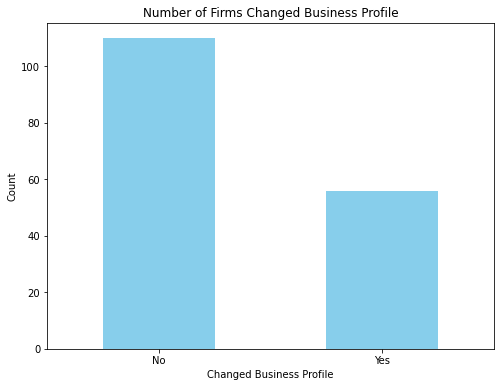

In [753]:
import matplotlib.pyplot as plt

# Count the number of firms that changed their business profile
profile_counts = df_gci['Changing_business_profile'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
profile_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Firms Changed Business Profile')
plt.xlabel('Changed Business Profile')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [754]:
merged_df = pd.merge(df_treated, df_gci[['Firm_Name', 'Changing_business_profile']], on='Firm_Name', how='inner')
merged_df 

,Firm_Name,NWP (£m) _2020YE,SCR coverage ratio_2020YE,GWP (£m)_2020YE,Total assets (£m)_2020YE,Excess of assets over liabilities (£m) [= equity]_2020YE,Gross claims incurred (£m)_2020YE,Net combined ratio_2020YE,NWP/GWP,Changing_business_profile
0,Firm 2,13.626145,3.170682,16.723242,2.665741,12.456319,0.000000,0.000000,0.814803,No
1,Firm 3,54.744180,0.245283,38.119418,540.594671,412.466207,0.000000,0.000000,1.436123,No
2,Firm 4,49204.465136,1.195829,37761.883321,37423.543261,24127.839035,3.668494,-3.548731,1.303019,No
3,Firm 5,61.727295,1.618600,32.277535,15.049929,103.180972,5.927624,1.869668,1.912392,Yes
4,Firm 6,5969.707516,2.497964,4209.115926,107547.787494,9295.371569,268.527873,0.384564,1.418281,No
...,...,...,...,...,...,...,...,...,...,...
161,Firm 316,-0.024124,3.045896,-0.263230,1793.992384,772.623500,126.537736,1.641400,0.091647,No
162,Firm 317,3479.287464,1.312616,3716.102706,8554.845015,373.962481,27.476123,0.602593,0.936273,Yes
163,Firm 321,31.258806,3.353946,67.341214,8619.920610,60.013312,2.682640,0.159544,0.464185,No
164,Firm 322,2780.628432,2.624036,1129.664936,4568.891465,3640.241631,58.267861,1.003350,2.461463,No


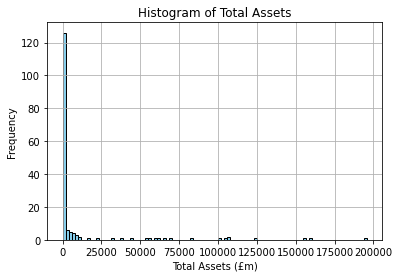

In [755]:
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame containing the 'Total assets' column
total_assets = merged_df['Total assets (£m)_2020YE']

# Plotting the histogram
plt.hist(total_assets, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Total Assets (£m)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Assets')
plt.grid(True)
plt.show()

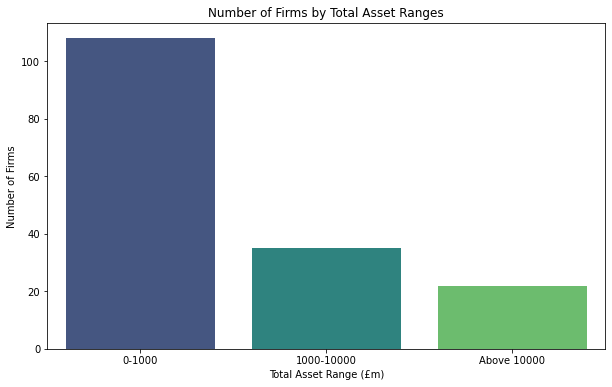

In [756]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the updated ranges for total assets
asset_ranges = ['0-1000', '1000-10000', 'Above 10000']

# Categorize firms based on total asset ranges
merged_df['Asset Range'] = pd.cut(merged_df['Total assets (£m)_2020YE'], bins=[0, 1000, 10000, float('inf')],
                                  labels=asset_ranges, right=False)

# Count the number of firms in each range
asset_counts = merged_df['Asset Range'].value_counts().reindex(asset_ranges, fill_value=0)

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=asset_counts.index, y=asset_counts.values, palette='viridis')
plt.title('Number of Firms by Total Asset Ranges')
plt.xlabel('Total Asset Range (£m)')
plt.ylabel('Number of Firms')
plt.show()

In [757]:
# Define the labels for the asset ranges
labels = ['Small', 'Medium', 'High']

# Map asset ranges to labels
merged_df['Asset Category'] = pd.cut(merged_df['Total assets (£m)_2020YE'],
                                     bins=[0, 1000, 10000, float('inf')],
                                     labels=labels, right=False)

merged_df

,Firm_Name,NWP (£m) _2020YE,SCR coverage ratio_2020YE,GWP (£m)_2020YE,Total assets (£m)_2020YE,Excess of assets over liabilities (£m) [= equity]_2020YE,Gross claims incurred (£m)_2020YE,Net combined ratio_2020YE,NWP/GWP,Changing_business_profile,Asset Range,Asset Category
0,Firm 2,13.626145,3.170682,16.723242,2.665741,12.456319,0.000000,0.000000,0.814803,No,0-1000,Small
1,Firm 3,54.744180,0.245283,38.119418,540.594671,412.466207,0.000000,0.000000,1.436123,No,0-1000,Small
2,Firm 4,49204.465136,1.195829,37761.883321,37423.543261,24127.839035,3.668494,-3.548731,1.303019,No,Above 10000,High
3,Firm 5,61.727295,1.618600,32.277535,15.049929,103.180972,5.927624,1.869668,1.912392,Yes,0-1000,Small
4,Firm 6,5969.707516,2.497964,4209.115926,107547.787494,9295.371569,268.527873,0.384564,1.418281,No,Above 10000,High
...,...,...,...,...,...,...,...,...,...,...,...,...
161,Firm 316,-0.024124,3.045896,-0.263230,1793.992384,772.623500,126.537736,1.641400,0.091647,No,1000-10000,Medium
162,Firm 317,3479.287464,1.312616,3716.102706,8554.845015,373.962481,27.476123,0.602593,0.936273,Yes,1000-10000,Medium
163,Firm 321,31.258806,3.353946,67.341214,8619.920610,60.013312,2.682640,0.159544,0.464185,No,1000-10000,Medium
164,Firm 322,2780.628432,2.624036,1129.664936,4568.891465,3640.241631,58.267861,1.003350,2.461463,No,1000-10000,Medium


In [758]:
column_range = merged_df['NWP/GWP'].describe()[['min', 'max']]

print("Range of the column:", column_range)

Range of the column: min    -1.417202
max    10.176081
Name: NWP/GWP, dtype: float64


In [759]:
#merged_df.to_excel('/Users/abhisaurav/Desktop/output.xlsx', index=False)  # Set index=False to exclude row indices in the CSV file


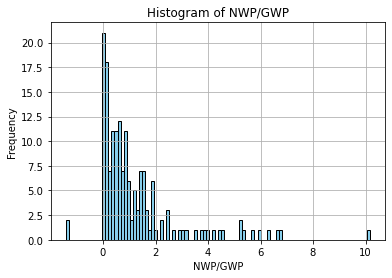

In [760]:
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame containing the 'Total assets' column
total_assets = merged_df['NWP/GWP']

# Plotting the histogram
plt.hist(total_assets, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('NWP/GWP')
plt.ylabel('Frequency')
plt.title('Histogram of NWP/GWP')
plt.grid(True)
plt.show()

In [761]:
#analysing NWP/GWP
merged_df['risk'] = np.where(merged_df['NWP/GWP'] < 2, 'Low Risk', 'High Risk')
merged_df

,Firm_Name,NWP (£m) _2020YE,SCR coverage ratio_2020YE,GWP (£m)_2020YE,Total assets (£m)_2020YE,Excess of assets over liabilities (£m) [= equity]_2020YE,Gross claims incurred (£m)_2020YE,Net combined ratio_2020YE,NWP/GWP,Changing_business_profile,Asset Range,Asset Category,risk
0,Firm 2,13.626145,3.170682,16.723242,2.665741,12.456319,0.000000,0.000000,0.814803,No,0-1000,Small,Low Risk
1,Firm 3,54.744180,0.245283,38.119418,540.594671,412.466207,0.000000,0.000000,1.436123,No,0-1000,Small,Low Risk
2,Firm 4,49204.465136,1.195829,37761.883321,37423.543261,24127.839035,3.668494,-3.548731,1.303019,No,Above 10000,High,Low Risk
3,Firm 5,61.727295,1.618600,32.277535,15.049929,103.180972,5.927624,1.869668,1.912392,Yes,0-1000,Small,Low Risk
4,Firm 6,5969.707516,2.497964,4209.115926,107547.787494,9295.371569,268.527873,0.384564,1.418281,No,Above 10000,High,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Firm 316,-0.024124,3.045896,-0.263230,1793.992384,772.623500,126.537736,1.641400,0.091647,No,1000-10000,Medium,Low Risk
162,Firm 317,3479.287464,1.312616,3716.102706,8554.845015,373.962481,27.476123,0.602593,0.936273,Yes,1000-10000,Medium,Low Risk
163,Firm 321,31.258806,3.353946,67.341214,8619.920610,60.013312,2.682640,0.159544,0.464185,No,1000-10000,Medium,Low Risk
164,Firm 322,2780.628432,2.624036,1129.664936,4568.891465,3640.241631,58.267861,1.003350,2.461463,No,1000-10000,Medium,High Risk


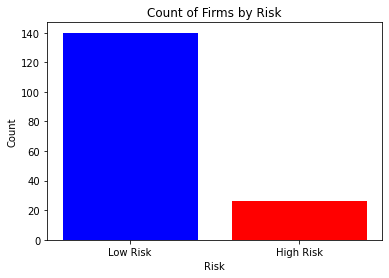

In [762]:
import matplotlib.pyplot as plt

# Count the number of firms in each risk category
risk_counts = merged_df['risk'].value_counts()

# Plot the counts
plt.bar(risk_counts.index, risk_counts.values, color=['blue', 'red'])
plt.xlabel('Risk')
plt.ylabel('Count')
plt.title('Count of Firms by Risk')
plt.show()

In [763]:
# Define the conditions for categorizing SCR
conditions = [
    (merged_df['SCR coverage ratio_2020YE'] < 1),
    (merged_df['SCR coverage ratio_2020YE'] >= 1) & (merged_df['SCR coverage ratio_2020YE'] <= 2),
    (merged_df['SCR coverage ratio_2020YE'] > 2)
]

# Define the corresponding labels for each condition
labels = ['Low', 'As Per', 'High']

# Apply the conditions and labels to create the new 'SCR' column
merged_df['SCR'] = np.select(conditions, labels, default=np.nan)

merged_df

,Firm_Name,NWP (£m) _2020YE,SCR coverage ratio_2020YE,GWP (£m)_2020YE,Total assets (£m)_2020YE,Excess of assets over liabilities (£m) [= equity]_2020YE,Gross claims incurred (£m)_2020YE,Net combined ratio_2020YE,NWP/GWP,Changing_business_profile,Asset Range,Asset Category,risk,SCR
0,Firm 2,13.626145,3.170682,16.723242,2.665741,12.456319,0.000000,0.000000,0.814803,No,0-1000,Small,Low Risk,High
1,Firm 3,54.744180,0.245283,38.119418,540.594671,412.466207,0.000000,0.000000,1.436123,No,0-1000,Small,Low Risk,Low
2,Firm 4,49204.465136,1.195829,37761.883321,37423.543261,24127.839035,3.668494,-3.548731,1.303019,No,Above 10000,High,Low Risk,As Per
3,Firm 5,61.727295,1.618600,32.277535,15.049929,103.180972,5.927624,1.869668,1.912392,Yes,0-1000,Small,Low Risk,As Per
4,Firm 6,5969.707516,2.497964,4209.115926,107547.787494,9295.371569,268.527873,0.384564,1.418281,No,Above 10000,High,Low Risk,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Firm 316,-0.024124,3.045896,-0.263230,1793.992384,772.623500,126.537736,1.641400,0.091647,No,1000-10000,Medium,Low Risk,High
162,Firm 317,3479.287464,1.312616,3716.102706,8554.845015,373.962481,27.476123,0.602593,0.936273,Yes,1000-10000,Medium,Low Risk,As Per
163,Firm 321,31.258806,3.353946,67.341214,8619.920610,60.013312,2.682640,0.159544,0.464185,No,1000-10000,Medium,Low Risk,High
164,Firm 322,2780.628432,2.624036,1129.664936,4568.891465,3640.241631,58.267861,1.003350,2.461463,No,1000-10000,Medium,High Risk,High


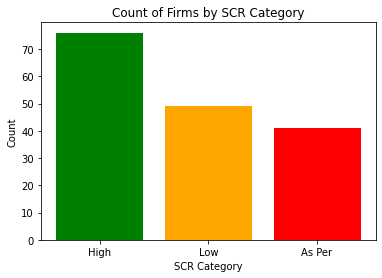

In [764]:
import matplotlib.pyplot as plt

# Count the number of firms in each SCR category
scr_counts = merged_df['SCR'].value_counts()

# Plot the counts
plt.bar(scr_counts.index, scr_counts.values, color=['green', 'orange', 'red'])
plt.xlabel('SCR Category')
plt.ylabel('Count')
plt.title('Count of Firms by SCR Category')
plt.show()

In [765]:
# Define the conditions for categorizing profit
conditions = [
    (merged_df['Net combined ratio_2020YE'] < 1),
    (merged_df['Net combined ratio_2020YE'] >= 1)
]

# Define the corresponding labels for each condition
labels = ['No', 'Yes']

# Apply the conditions and labels to create the new 'profit' column
merged_df['profit'] = np.select(conditions, labels, default=np.nan)

merged_df

,Firm_Name,NWP (£m) _2020YE,SCR coverage ratio_2020YE,GWP (£m)_2020YE,Total assets (£m)_2020YE,Excess of assets over liabilities (£m) [= equity]_2020YE,Gross claims incurred (£m)_2020YE,Net combined ratio_2020YE,NWP/GWP,Changing_business_profile,Asset Range,Asset Category,risk,SCR,profit
0,Firm 2,13.626145,3.170682,16.723242,2.665741,12.456319,0.000000,0.000000,0.814803,No,0-1000,Small,Low Risk,High,No
1,Firm 3,54.744180,0.245283,38.119418,540.594671,412.466207,0.000000,0.000000,1.436123,No,0-1000,Small,Low Risk,Low,No
2,Firm 4,49204.465136,1.195829,37761.883321,37423.543261,24127.839035,3.668494,-3.548731,1.303019,No,Above 10000,High,Low Risk,As Per,No
3,Firm 5,61.727295,1.618600,32.277535,15.049929,103.180972,5.927624,1.869668,1.912392,Yes,0-1000,Small,Low Risk,As Per,Yes
4,Firm 6,5969.707516,2.497964,4209.115926,107547.787494,9295.371569,268.527873,0.384564,1.418281,No,Above 10000,High,Low Risk,High,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Firm 316,-0.024124,3.045896,-0.263230,1793.992384,772.623500,126.537736,1.641400,0.091647,No,1000-10000,Medium,Low Risk,High,Yes
162,Firm 317,3479.287464,1.312616,3716.102706,8554.845015,373.962481,27.476123,0.602593,0.936273,Yes,1000-10000,Medium,Low Risk,As Per,No
163,Firm 321,31.258806,3.353946,67.341214,8619.920610,60.013312,2.682640,0.159544,0.464185,No,1000-10000,Medium,Low Risk,High,No
164,Firm 322,2780.628432,2.624036,1129.664936,4568.891465,3640.241631,58.267861,1.003350,2.461463,No,1000-10000,Medium,High Risk,High,Yes


In [776]:
#identify firm (change metrics based on analysis)


filtered_firms = merged_df[
    (merged_df['profit'] == 'Yes') & 
  ((merged_df['SCR'] == 'High') | (merged_df['SCR'] == 'As Per')) & 
    (merged_df['Changing_business_profile'] == 'No') & 
    (merged_df['risk']=="Low Risk") &
    ((merged_df['Asset Category'] == 'Small'))
]

filtered_firms

,Firm_Name,NWP (£m) _2020YE,SCR coverage ratio_2020YE,GWP (£m)_2020YE,Total assets (£m)_2020YE,Excess of assets over liabilities (£m) [= equity]_2020YE,Gross claims incurred (£m)_2020YE,Net combined ratio_2020YE,NWP/GWP,Changing_business_profile,Asset Range,Asset Category,risk,SCR,profit
41,Firm 75,3.003249,4.294430,24.828417,105.344124,107.362258,3.061166,1.680132,0.120960,No,0-1000,Small,Low Risk,High,Yes
44,Firm 81,0.133175,5.143149,0.069529,4.268400,4.597364,802.321712,1.338463,1.915374,No,0-1000,Small,Low Risk,High,Yes
80,Firm 161,28.908860,4.136667,20.135682,87.244763,32.423866,-13.168996,1.801566,1.435703,No,0-1000,Small,Low Risk,High,Yes
92,Firm 185,0.001043,2.453455,0.006362,16.998858,3.720507,36.374415,1.365777,0.163868,No,0-1000,Small,Low Risk,High,Yes


# Cluster Analysis

In [682]:
#Cluster Analysis
merged_df
cluster_df = merged_df.iloc[:, :-6]
cluster_df

,Firm_Name,NWP (£m) _2020YE,SCR coverage ratio_2020YE,GWP (£m)_2020YE,Total assets (£m)_2020YE,Excess of assets over liabilities (£m) [= equity]_2020YE,Gross claims incurred (£m)_2020YE,Net combined ratio_2020YE,NWP/GWP
0,Firm 2,13.626145,3.170682,16.723242,2.665741,12.456319,0.000000,0.000000,0.814803
1,Firm 3,54.744180,0.245283,38.119418,540.594671,412.466207,0.000000,0.000000,1.436123
2,Firm 4,49204.465136,1.195829,37761.883321,37423.543261,24127.839035,3.668494,-3.548731,1.303019
3,Firm 5,61.727295,1.618600,32.277535,15.049929,103.180972,5.927624,1.869668,1.912392
4,Firm 6,5969.707516,2.497964,4209.115926,107547.787494,9295.371569,268.527873,0.384564,1.418281
...,...,...,...,...,...,...,...,...,...
161,Firm 316,-0.024124,3.045896,-0.263230,1793.992384,772.623500,126.537736,1.641400,0.091647
162,Firm 317,3479.287464,1.312616,3716.102706,8554.845015,373.962481,27.476123,0.602593,0.936273
163,Firm 321,31.258806,3.353946,67.341214,8619.920610,60.013312,2.682640,0.159544,0.464185
164,Firm 322,2780.628432,2.624036,1129.664936,4568.891465,3640.241631,58.267861,1.003350,2.461463


In [731]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = cluster_df.drop(['Firm_Name'], axis=1)  # Exclude Firm_Name column from clustering
df_X = X

from sklearn.preprocessing import StandardScaler

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit and transform the data to normalize it
X_scaled = scaler.fit_transform(X)


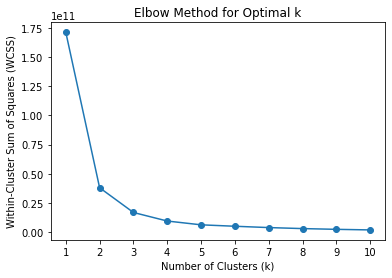

In [732]:

# Initialize an empty list to store the within-cluster sum of squares (WCSS) for different values of k
wcss = []

# Define the range of k values to try
k_values = range(1, 11)

# Iterate through each value of k and compute the KMeans clustering
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Append the WCSS to the list

# Plot the WCSS values for different values of k
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.show()

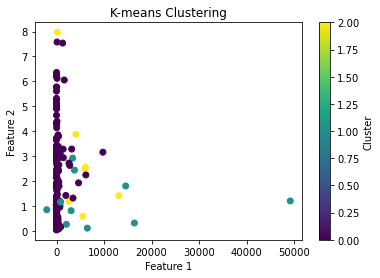

In [733]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Visualize the clusters 
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [734]:
# Add the cluster column to your dataframe
cluster_df['Cluster'] = clusters

In [735]:
cluster_df

,Firm_Name,NWP (£m) _2020YE,SCR coverage ratio_2020YE,GWP (£m)_2020YE,Total assets (£m)_2020YE,Excess of assets over liabilities (£m) [= equity]_2020YE,Gross claims incurred (£m)_2020YE,Net combined ratio_2020YE,NWP/GWP,Cluster
0,Firm 2,13.626145,3.170682,16.723242,2.665741,12.456319,0.000000,0.000000,0.814803,0
1,Firm 3,54.744180,0.245283,38.119418,540.594671,412.466207,0.000000,0.000000,1.436123,0
2,Firm 4,49204.465136,1.195829,37761.883321,37423.543261,24127.839035,3.668494,-3.548731,1.303019,1
3,Firm 5,61.727295,1.618600,32.277535,15.049929,103.180972,5.927624,1.869668,1.912392,0
4,Firm 6,5969.707516,2.497964,4209.115926,107547.787494,9295.371569,268.527873,0.384564,1.418281,2
...,...,...,...,...,...,...,...,...,...,...
161,Firm 316,-0.024124,3.045896,-0.263230,1793.992384,772.623500,126.537736,1.641400,0.091647,0
162,Firm 317,3479.287464,1.312616,3716.102706,8554.845015,373.962481,27.476123,0.602593,0.936273,0
163,Firm 321,31.258806,3.353946,67.341214,8619.920610,60.013312,2.682640,0.159544,0.464185,0
164,Firm 322,2780.628432,2.624036,1129.664936,4568.891465,3640.241631,58.267861,1.003350,2.461463,0


<AxesSubplot:xlabel='Cluster', ylabel='Total assets (£m)_2020YE'>

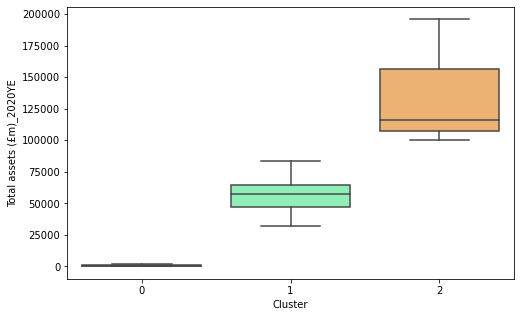

In [736]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster',y='Total assets (£m)_2020YE',data=cluster_df, palette='rainbow',showfliers = False)

<AxesSubplot:xlabel='Cluster', ylabel='NWP/GWP'>

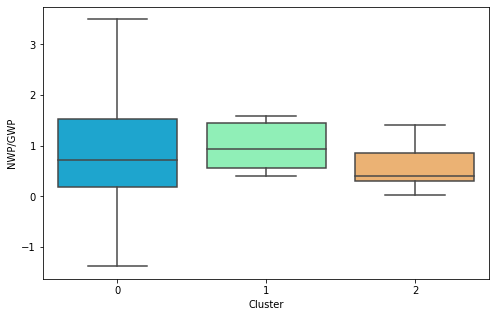

In [737]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster',y='NWP/GWP',data=cluster_df, palette='rainbow',showfliers = False)

<AxesSubplot:xlabel='Cluster', ylabel='SCR coverage ratio_2020YE'>

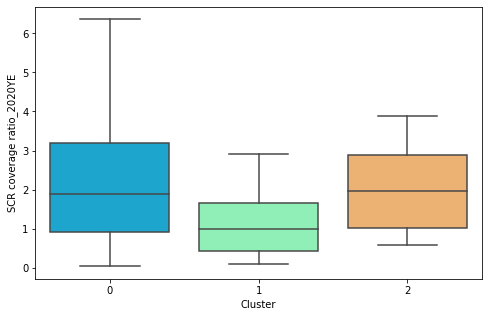

In [738]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster',y='SCR coverage ratio_2020YE',data=cluster_df, palette='rainbow',showfliers = False)

<AxesSubplot:xlabel='Cluster', ylabel='Gross claims incurred (£m)_2020YE'>

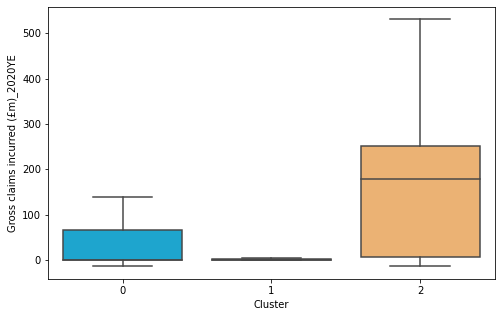

In [739]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster',y='Gross claims incurred (£m)_2020YE',data=cluster_df, palette='rainbow',showfliers = False)

<AxesSubplot:xlabel='Cluster', ylabel='Net combined ratio_2020YE'>

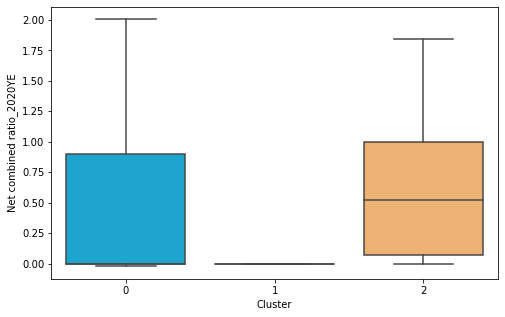

In [740]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster',y='Net combined ratio_2020YE',data=cluster_df, palette='rainbow',showfliers = False)